# Requirements

In [1]:
# import the necessary packages
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2
import os

# Loading Models

In [2]:
IMAGE_ADDRESS = os.path.join("images", "tehran.jpg")
YOLO_WEIGHT = os.path.join("models", "yolov3.weights")
YOLO_CONFIG_PATH = os.path.join("models", "yolov3.cfg")
YOLO_LABELES_PATH = os.path.join("models", "coco.names")
CONFIDENCE = 0.5
THRESHOLD = 0.3

# load our YOLO object detector trained on COCO dataset (80 classes)
net = cv2.dnn.readNetFromDarknet(YOLO_CONFIG_PATH, YOLO_WEIGHT)
LABELS = open(YOLO_LABELES_PATH).read().strip().split("\n")

# initialize a list of colors to represent each possible class label
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

# Loading Image

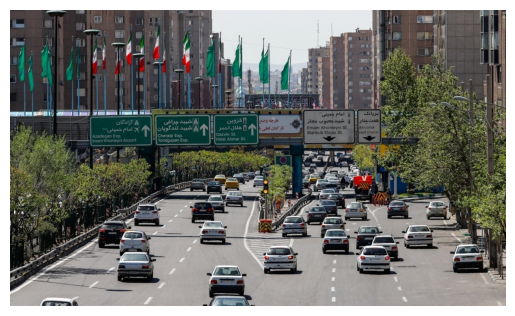

In [3]:
# Load our input image from the specified address
image = cv2.imread(IMAGE_ADDRESS)

# Convert the image from BGR to RGB color space for displaying with Matplotlib
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Grab the spatial dimensions (height and width) of the image
H, W = image.shape[:2]

# Display Original Image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

# Object Detection Function

In [4]:
# Object Detection Function
def YOLO(image, net):
    # Get the names of all the layers in the network
    ln = net.getLayerNames()
    # Get the names of the output layers (those layers that produce the final predictions)
    ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

    # Construct a blob from the input image and perform mean subtraction, scaling, and channel swapping
    blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)  # TODO
    # Set the blob as input to the network
    net.setInput(blob)  # TODO
    
    # Perform a forward pass through the network to get the output predictions
    layerOutputs = net.forward(ln)  # TODO

    # Initialize lists to store the bounding boxes, confidences, and class IDs of the detected objects
    boxes = []
    confidences = []
    classIDs = []

    # Loop over each of the layer outputs
    for output in layerOutputs:
        # Loop over each detection in the output
        for detection in output:
            # Extract the scores for each class and find the class ID with the highest score
            scores = detection[5:]
            classID = np.argmax(scores)
            confidence = scores[classID]
            # Filter out weak predictions by ensuring the confidence is greater than the threshold
            if confidence > CONFIDENCE:
                # Scale the bounding box coordinates back to the size of the original image
                box = detection[0:4] * np.array([W, H, W, H])
                (centerX, centerY, width, height) = box.astype("int")
                # Use the center coordinates to derive the top-left corner of the bounding box
                x = int(centerX - (width / 2))
                y = int(centerY - (height / 2))
                # Update the lists of bounding box coordinates, confidences, and class IDs
                boxes.append([x, y, int(width), int(height)])
                confidences.append(float(confidence))
                classIDs.append(classID)

    # Apply non-maxima suppression to suppress weak, overlapping bounding boxes
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, CONFIDENCE, THRESHOLD)

    # Ensure at least one detection exists
    if len(idxs) > 0:
        # Loop over the indexes we are keeping
        for i in idxs.flatten():
            # Extract the bounding box coordinates
            (x, y) = (boxes[i][0], boxes[i][1])
            (w, h) = (boxes[i][2], boxes[i][3])
            
            # Draw the bounding box rectangle and label on the image
            color = [int(c) for c in COLORS[classIDs[i]]]

            # Draw a rectangle around the detected object on the image
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)  # TODO

            # Prepare the text label to display the object's class and confidence score
            text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])

            # Draw the text label on the image above the bounding box
            cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)  # TODO

    # Return the output image with the drawn bounding boxes and labels
    return image

# Visualizing the Result

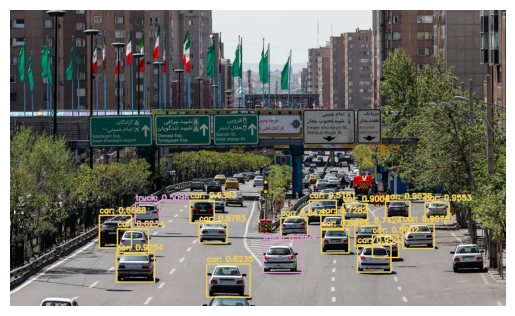

In [5]:
# Visualizing the Result
# Detect objects of the image
result = YOLO(image, net)

# Display the result
plt.imshow(result) 
plt.axis('off') 
plt.show() 


گزارش مختصری از نحوه عملکرد پروژه "YOLO Object Detection":

---

### **گزارش مختصر نحوه عملکرد پروژه YOLO Object Detection**

**عنوان پروژه:** YOLO Object Detection

**تکنولوژی مورد استفاده:** یادگیری عمیق، شبکه عصبی کانولوشنی (CNN)، OpenCV

**هدف پروژه:** شناسایی و دسته‌بندی اشیاء مختلف در تصاویر ورودی با استفاده از مدل پیش‌آموزش‌یافته YOLO v3.

#### **مراحل انجام پروژه:**

1. **بارگذاری مدل و داده‌ها:**
   - مدل YOLO v3 به همراه وزن‌ها (weights)، پیکربندی (cfg) و برچسب‌ها (labels) از مسیرهای مشخص‌شده بارگذاری شد.
   - تصویر ورودی که شامل اشیاء مختلف بود، از پوشه تصاویر خوانده شد.

2. **پیش‌پردازش تصویر:**
   - تصویر ورودی به فرمت قابل قبول برای شبکه عصبی تبدیل شد. این تبدیل شامل مقیاس‌بندی تصویر به اندازه 416x416 پیکسل و اعمال عملیات پیش‌پردازش مانند نرمال‌سازی رنگ‌ها بود.
   - سپس تصویر به یک blob تبدیل شد که به عنوان ورودی به شبکه عصبی ارسال می‌شود.

3. **شناسایی اشیاء با استفاده از YOLO:**
   - پس از پردازش تصویر، شبکه عصبی YOLO شروع به شناسایی اشیاء در تصویر می‌کند. خروجی مدل شامل پیش‌بینی‌هایی از کلاس‌ها، احتمال‌ها و جعبه‌های محدود (bounding boxes) اشیاء شناسایی‌شده است.
   - تنها پیش‌بینی‌هایی که احتمال بیشتر از آستانه (Threshold) 0.5 دارند، برای شناسایی نهایی انتخاب شدند.

4. **نشان دادن نتایج:**
   - پس از شناسایی اشیاء، جعبه‌های محدود اطراف اشیاء مختلف ترسیم شدند.
   - برچسب‌هایی شامل نام کلاس و احتمال شیء در کنار جعبه‌های محدود نمایش داده شدند.
   - تصویر نهایی با جعبه‌های شناسایی‌شده و برچسب‌ها در محیط ژوپیتر نوت‌بوک به نمایش درآمد.

5. **خروجی نهایی:**
   - خروجی نهایی تصویری است که در آن اشیاء مختلف با استفاده از جعبه‌های محدود و برچسب‌های کلاس شناسایی شده‌اند.

#### **نتایج و تحلیل:**
- این پروژه با موفقیت توانست اشیاء مختلف را در تصویر شناسایی کند. دقت شناسایی و دسته‌بندی به کیفیت تصویر و صحت آموزش مدل بستگی دارد.
- مدل YOLO به دلیل سرعت بالا و دقت قابل قبول در تشخیص اشیاء، برای کاربردهای مختلف مانند نظارت و شناسایی اشیاء در تصاویر و ویدئوها مناسب است.

#### **نتیجه‌گیری:**
- مدل YOLO v3 یک ابزار قدرتمند برای شناسایی اشیاء در تصاویر است. با استفاده از این مدل و کد موجود، توانستیم اشیاء مختلف را در تصویر شناسایی کرده و نتایج را به‌صورت گرافیکی نمایش دهیم.